# Feature Engineering

In this notebook, feature engineering on the user-id level takes place

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set display settings: Turning off scientific notation and getting max column width displays
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.3f}'.format)

## Load in the files

In [3]:
# Demographic files
d_demo = pd.read_csv('../Data/Combined_sets/d_processed_demographics.tsv', header=[0,1], index_col=[0], sep='\t')
a_demo = pd.read_csv('../Data/Combined_sets/a_processed_demographics.tsv', header=[0,1], index_col=[0], sep='\t')

# Cohort files
d_cohort = pd.read_csv('../Data/Combined_sets/d_combined_cohort_tz.tsv', sep='\t', index_col="tweet_id")
a_cohort = pd.read_csv('../Data/Combined_sets/a_combined_cohort_tz.tsv', sep='\t', index_col="tweet_id")


In [5]:
print(d_cohort.columns)

Index(['user_id', 'VADER', 'local_time', 'created_at_hour', 'day_of_week',
       'sum_labeling', 'labeling_mislabeling', 'sum_catastrophising',
       'catastrophising', 'sum_dichotomous',
       ...
       'VADER_NEU', 'VADER_POS', 'word_count', 'punctuation_count',
       'exclamation_count', 'mention_count', 'emoji_count', 'has_emoji',
       'positive_emojis', 'negative_emojis'],
      dtype='object', length=105)


# Feature engineering 

Let's name a new dataframe that will become the general depression and anxiety dataframes

In [6]:
depression = d_demo
anxiety = a_demo

## Affect Features

Has two features:

1. within-subject general, positive and negative affect  = average VADER score per user
2. affect variability  = standard deviation per user on VADER scores 


In [9]:
# DEPRESSION
# within-subject VADER NA
d_average_NA = d_cohort.groupby('user_id')['VADER_NEG'].mean()
d_average_VADER = d_cohort.groupby('user_id')['VADER'].mean()
d_average_PA = d_cohort.groupby('user_id')['VADER_POS'].mean()

# NAV 
d_NAV = d_cohort.groupby('user_id')['VADER_NEG'].std()
d_AV = d_cohort.groupby('user_id')['VADER'].std()
d_PAV = d_cohort.groupby('user_id')['VADER_POS'].std()

depression['Affect', 'mean_NA'] = d_average_NA
depression['Affect', 'NAV'] = d_NAV

depression['Affect', 'mean_affect'] = d_average_NA
depression['Affect', 'AV'] = d_AV

depression['Affect', 'mean_PA'] = d_average_PA
depression['Affect', 'PAV'] = d_PAV


In [10]:
# ANXIETY
# within-subject VADER NA
a_average_NA = a_cohort.groupby('user_id')['VADER_NEG'].mean()
a_average_VADER = a_cohort.groupby('user_id')['VADER'].mean()
a_average_PA = a_cohort.groupby('user_id')['VADER_POS'].mean()

# NAV 
a_NAV = a_cohort.groupby('user_id')['VADER_NEG'].std()
a_AV = a_cohort.groupby('user_id')['VADER'].std()
a_PAV = a_cohort.groupby('user_id')['VADER_POS'].std()

anxiety['Affect', 'mean_NA'] = a_average_NA
anxiety['Affect', 'NAV'] = a_NAV

anxiety['Affect', 'mean_affect'] = a_average_VADER
anxiety['Affect', 'AV'] = a_AV

anxiety['Affect', 'mean_PA'] = a_average_PA
anxiety['Affect', 'PAV'] = a_PAV


## Tweet features


* total number of tweets (important for CDS)
* standard deviation of words?
* average wordcount per tweet per person
* sum of punctuations?
* sum of emojis per person
* sum of positive emojis per person
* relative???

In [11]:
# number of tweets per user:

# DEPRESSION
d_tweet_count = d_cohort.groupby('user_id').size()
depression['Tweet_Count', 'timeline'] = d_tweet_count

# ANXIETY
a_tweet_count = a_cohort.groupby('user_id').size()
anxiety['Tweet_Count', 'timeline'] = a_tweet_count

In [12]:
# DEPRESSION
# Average word count
total_words = d_cohort.groupby('user_id')['word_count'].sum()

# Average words per tweet
mean_words = total_words / d_tweet_count

# SD word count
sd_words = d_cohort.groupby('user_id')['word_count'].std()

# Min words
min_words = d_cohort.groupby('user_id')['word_count'].min()

# Max words
max_words = d_cohort.groupby('user_id')['word_count'].max()

# add to the dataframe
#depression['Tweet_Count', 'total_words'] = total_words
depression['Tweet_Count', 'mean_words'] = mean_words
depression['Tweet_Count', 'sd_words'] = sd_words
depression['Tweet_Count', 'min_words'] = min_words
depression['Tweet_Count', 'max_words'] = max_words

# log scale total words
depression['Tweet_Count', 'log_words'] = np.log2(total_words + 1)

In [13]:
# ANXIETY
# Average word count
total_words = a_cohort.groupby('user_id')['word_count'].sum()

# Average words per tweet
mean_words = total_words / a_tweet_count

# SD word count
sd_words = a_cohort.groupby('user_id')['word_count'].std()

# Min words
min_words = a_cohort.groupby('user_id')['word_count'].min()

# Max words
max_words = a_cohort.groupby('user_id')['word_count'].max()

# add to the dataframe
#anxiety['Tweet_Count', 'total_words'] = total_words
anxiety['Tweet_Count', 'mean_words'] = mean_words
anxiety['Tweet_Count', 'sd_words'] = sd_words
anxiety['Tweet_Count', 'min_words'] = min_words
anxiety['Tweet_Count', 'max_words'] = max_words

# log scale total_words
anxiety['Tweet_Count', 'log_words'] = np.log2(total_words + 1)

### Punctuation

In [15]:
# DEPRESSION

# Average word count
total_punctuation = d_cohort.groupby('user_id')['punctuation_count'].sum()
total_exclamation = d_cohort.groupby('user_id')['exclamation_count'].sum()

# Average words per tweet
mean_punctuation = total_punctuation / d_tweet_count
mean_exclamation = total_exclamation / d_tweet_count

# add to the dataframe
depression['Tweet_Count', 'mean_punct'] = mean_punctuation
depression['Tweet_Count', 'mean_exclam'] = mean_exclamation

# Log scale the total_ columns, +1 normalised
depression['Tweet_Count', 'log_punct'] = np.log2(total_punctuation + 1)
depression['Tweet_Count', 'log_exclam'] = np.log2(total_exclamation + 1)

In [16]:
# ANXIETY
# Average word count
total_punctuation = a_cohort.groupby('user_id')['punctuation_count'].sum()
total_exclamation = a_cohort.groupby('user_id')['exclamation_count'].sum()

# Average words per tweet
mean_punctuation = total_punctuation / a_tweet_count
mean_exclamation = total_exclamation / a_tweet_count

# add to the dataframe
anxiety['Tweet_Count', 'mean_punct'] = mean_punctuation
anxiety['Tweet_Count', 'mean_exclam'] = mean_exclamation


# Log scale the total_ columns
anxiety['Tweet_Count', 'log_punct'] = np.log2(total_punctuation + 1)
anxiety['Tweet_Count', 'log_exclam'] = np.log2(total_exclamation + 1)

### Mentions

In [17]:
# ANXIETY
# Average word count
total_mentions = d_cohort.groupby('user_id')['mention_count'].sum()

# Calculate proportion of total mentions per tweets
depression['Tweet_Count', 'mentions_p'] = total_mentions / d_tweet_count


In [18]:
# ANXIETY
# Average word count
total_mentions = a_cohort.groupby('user_id')['mention_count'].sum()

# Calculate proportion of total mentions per tweets
anxiety['Tweet_Count', 'mentions_p'] = total_mentions / a_tweet_count


### Emojis

In [19]:
# DEPRESSION
# Average word count
total_emoji = d_cohort.groupby('user_id')['emoji_count'].sum()
pos_emoji_sum = d_cohort.groupby('user_id')['positive_emojis'].sum()
neg_emoji_sum = d_cohort.groupby('user_id')['negative_emojis'].sum()

# Average words per tweet
mean_emoji = total_emoji / d_tweet_count

# add to the dataframe
depression['Emojis', 'mean_emoji'] = mean_emoji
depression['Emojis', 'log_total_emoji'] = np.log2(total_emoji + 1)
depression['Emojis', 'neg_emoji_p'] = neg_emoji_sum / total_emoji
depression['Emojis', 'pos_emoji_p'] = pos_emoji_sum / total_emoji


In [20]:
# ANXIETY
# Average word count
total_emoji = a_cohort.groupby('user_id')['emoji_count'].sum()

pos_emoji_sum = a_cohort.groupby('user_id')['positive_emojis'].sum()
neg_emoji_sum = a_cohort.groupby('user_id')['negative_emojis'].sum()

# Average words per tweet
mean_emoji = total_emoji / a_tweet_count

# add to the dataframe

anxiety['Emojis', 'mean_emoji'] = mean_emoji
anxiety['Emojis', 'log_total_emoji'] = np.log2(total_emoji + 1)
anxiety['Emojis', 'neg_emoji_p'] = neg_emoji_sum / total_emoji
anxiety['Emojis', 'pos_emoji_p'] = pos_emoji_sum / total_emoji


## CDS within-user prevalence

Within-user prevalence = For each individual, we counted the number of their tweets containing any of the 241 CDS and divided it by their total number of tweets, resulting in a single within-individual CDS prevalence (Bathina, 2021)

### CDS prevalence per category

#### Depression

In [22]:
# LABELING/MISLABELING
# sum of labeling/mislabeling per user
total_labeling = d_cohort.groupby('user_id')['labeling_mislabeling'].sum()

# prevalence
label_mislabel_prevalence = total_labeling / d_tweet_count

# add to the dataframe
depression['CDS_prevalence', 'labeling_mislabeling'] = label_mislabel_prevalence

#_______________________________________________________________________________

# LABELING/MISLABELING
# sum boolean feature per user
total_labeling = d_cohort.groupby('user_id')['labeling_mislabeling'].sum()

# prevalence
label_mislabel_prevalence = total_labeling / d_tweet_count

# add to the dataframe
depression['CDS_prevalence', 'labeling_mislabeling'] = label_mislabel_prevalence

#_______________________________________________________________________________

# CATASTROPHISING
# sum boolean feature per user
total_catastrophising = d_cohort.groupby('user_id')['catastrophising'].sum()

# prevalence
catastrophising_prevalence = total_catastrophising / d_tweet_count

# add to the dataframe
depression['CDS_prevalence', 'catastrophising'] = catastrophising_prevalence

#_______________________________________________________________________________

# DICHOTOMOUS REASONING
# sum boolean feature per user
total_dichotomous = d_cohort.groupby('user_id')['dichotomous_reasoning'].sum()

# prevalence
dichotomous_prevalence = total_dichotomous / d_tweet_count

# add to the dataframe
depression['CDS_prevalence', 'dichotomous_reasoning'] = dichotomous_prevalence

#_______________________________________________________________________________

# EMOTIONAL REASONING
# sum boolean feature per user
total_emotional = d_cohort.groupby('user_id')['emotional_reasoning'].sum()

# prevalence
emotional_prevalence = total_emotional / d_tweet_count

# add to the dataframe
depression['CDS_prevalence', 'emotional_reasoning'] = emotional_prevalence

#_______________________________________________________________________________

# DISQUALIFYING THE POSITIVE
# sum boolean feature per user
total_disqualifying = d_cohort.groupby('user_id')['disqualifying_positive'].sum()

# prevalence
disqualifying_prevalence = total_disqualifying / d_tweet_count

# add to the dataframe
depression['CDS_prevalence', 'disqualifying_positive'] = disqualifying_prevalence

#_______________________________________________________________________________

# MAGNIFICATION AND MINIMISATION
# sum boolean feature per user
total_magmin = d_cohort.groupby('user_id')['magnification_minimisation'].sum()

# prevalence
magmin_prevalence = total_magmin / d_tweet_count

# add to the dataframe
depression['CDS_prevalence', 'magnification_minimisation'] = magmin_prevalence

#_______________________________________________________________________________

# MENTAL FILTERING
# sum boolean feature per user
total_filtering = d_cohort.groupby('user_id')['mental_filtering'].sum()

# prevalence
filtering_prevalence = total_filtering / d_tweet_count

# add to the dataframe
depression['CDS_prevalence', 'mental_filtering'] = filtering_prevalence

#_______________________________________________________________________________

# MINDREADING
# sum boolean feature per user
total_mindreading = d_cohort.groupby('user_id')['mindreading'].sum()

# prevalence
mindreading_prevalence = total_mindreading / d_tweet_count

# add to the dataframe
depression['CDS_prevalence', 'mindreading'] = mindreading_prevalence

#_______________________________________________________________________________

# FORTUNETELLING
# sum boolean feature per user
total_fortunetelling = d_cohort.groupby('user_id')['fortunetelling'].sum()

# prevalence
fortune_prevalence = total_fortunetelling / d_tweet_count

# add to the dataframe
depression['CDS_prevalence', 'fortunetelling'] = fortune_prevalence

#_______________________________________________________________________________

# OVERGENERALISATION
# sum boolean feature per user
total_overgeneralisation = d_cohort.groupby('user_id')['overgeneralisation'].sum()

# prevalence
overgeneralisation_prevalence = total_overgeneralisation / d_tweet_count

# add to the dataframe
depression['CDS_prevalence', 'overgeneralisation'] = overgeneralisation_prevalence

#_______________________________________________________________________________

# PERSONALISATION
# sum boolean feature per user
total_personalisation = d_cohort.groupby('user_id')['personalisation'].sum()

# prevalence
personalisation_prevalence = total_personalisation / d_tweet_count

# add to the dataframe
depression['CDS_prevalence', 'personalisation'] = personalisation_prevalence

#_______________________________________________________________________________

# PERSONALISATION
# sum boolean feature per user
total_should = d_cohort.groupby('user_id')['should_statements'].sum()

# prevalence
should_prevalence = total_should / d_tweet_count

# add to the dataframe
depression['CDS_prevalence', 'should_statements'] = should_prevalence



#### Anxiety

In [23]:
# LABELING/MISLABELING
# sum of labeling/mislabeling per user
total_labeling = a_cohort.groupby('user_id')['labeling_mislabeling'].sum()

# prevalence
label_mislabel_prevalence = total_labeling / a_tweet_count

# add to the dataframe
anxiety['CDS_prevalence', 'labeling_mislabeling'] = label_mislabel_prevalence

#_______________________________________________________________________________

# LABELING/MISLABELING
# sum boolean feature per user
total_labeling = a_cohort.groupby('user_id')['labeling_mislabeling'].sum()

# prevalence
label_mislabel_prevalence = total_labeling / a_tweet_count

# add to the dataframe
anxiety['CDS_prevalence', 'labeling_mislabeling'] = label_mislabel_prevalence

#_______________________________________________________________________________

# CATASTROPHISING
# sum boolean feature per user
total_catastrophising = a_cohort.groupby('user_id')['catastrophising'].sum()

# prevalence
catastrophising_prevalence = total_catastrophising / a_tweet_count

# add to the dataframe
anxiety['CDS_prevalence', 'catastrophising'] = catastrophising_prevalence

#_______________________________________________________________________________

# DICHOTOMOUS REASONING
# sum boolean feature per user
total_dichotomous = a_cohort.groupby('user_id')['dichotomous_reasoning'].sum()

# prevalence
dichotomous_prevalence = total_dichotomous / a_tweet_count

# add to the dataframe
anxiety['CDS_prevalence', 'dichotomous_reasoning'] = dichotomous_prevalence

#_______________________________________________________________________________

# EMOTIONAL REASONING
# sum boolean feature per user
total_emotional = a_cohort.groupby('user_id')['emotional_reasoning'].sum()

# prevalence
emotional_prevalence = total_emotional / a_tweet_count

# add to the dataframe
anxiety['CDS_prevalence', 'emotional_reasoning'] = emotional_prevalence

#_______________________________________________________________________________

# DISQUALIFYING THE POSITIVE
# sum boolean feature per user
total_disqualifying = a_cohort.groupby('user_id')['disqualifying_positive'].sum()

# prevalence
disqualifying_prevalence = total_disqualifying / a_tweet_count

# add to the dataframe
anxiety['CDS_prevalence', 'disqualifying_positive'] = disqualifying_prevalence

#_______________________________________________________________________________

# MAGNIFICATION AND MINIMISATION
# sum boolean feature per user
total_magmin = a_cohort.groupby('user_id')['magnification_minimisation'].sum()

# prevalence
magmin_prevalence = total_magmin / a_tweet_count

# add to the dataframe
anxiety['CDS_prevalence', 'magnification_minimisation'] = magmin_prevalence

#_______________________________________________________________________________

# MENTAL FILTERING
# sum boolean feature per user
total_filtering = a_cohort.groupby('user_id')['mental_filtering'].sum()

# prevalence
filtering_prevalence = total_filtering / a_tweet_count

# add to the dataframe
anxiety['CDS_prevalence', 'mental_filtering'] = filtering_prevalence

#_______________________________________________________________________________

# MINDREADING
# sum boolean feature per user
total_mindreading = a_cohort.groupby('user_id')['mindreading'].sum()

# prevalence
mindreading_prevalence = total_mindreading / a_tweet_count

# add to the dataframe
anxiety['CDS_prevalence', 'mindreading'] = mindreading_prevalence

#_______________________________________________________________________________

# FORTUNETELLING
# sum boolean feature per user
total_fortunetelling = a_cohort.groupby('user_id')['fortunetelling'].sum()

# prevalence
fortune_prevalence = total_fortunetelling / a_tweet_count

# add to the dataframe
anxiety['CDS_prevalence', 'fortunetelling'] = fortune_prevalence

#_______________________________________________________________________________

# OVERGENERALISATION
# sum boolean feature per user
total_overgeneralisation = a_cohort.groupby('user_id')['overgeneralisation'].sum()

# prevalence
overgeneralisation_prevalence = total_overgeneralisation / a_tweet_count

# add to the dataframe
anxiety['CDS_prevalence', 'overgeneralisation'] = overgeneralisation_prevalence

#_______________________________________________________________________________

# PERSONALISATION
# sum boolean feature per user
total_personalisation = a_cohort.groupby('user_id')['personalisation'].sum()

# prevalence
personalisation_prevalence = total_personalisation / a_tweet_count

# add to the dataframe
anxiety['CDS_prevalence', 'personalisation'] = personalisation_prevalence

#_______________________________________________________________________________

# PERSONALISATION
# sum boolean feature per user
total_should = a_cohort.groupby('user_id')['should_statements'].sum()

# prevalence
should_prevalence = total_should / a_tweet_count

# add to the dataframe
anxiety['CDS_prevalence', 'should_statements'] = should_prevalence



## Date time features

Total proportion of tweets posted per weekday

In [25]:
# # DEPRESSION
sum_Monday_d = d_cohort.groupby('user_id')['day_Monday'].sum()
sum_Tuesday_d = d_cohort.groupby('user_id')['day_Tuesday'].sum()
sum_Wednesday_d = d_cohort.groupby('user_id')['day_Wednesday'].sum()
sum_Thursday_d = d_cohort.groupby('user_id')['day_Thursday'].sum()
sum_Friday_d = d_cohort.groupby('user_id')['day_Friday'].sum()
sum_Saturday_d = d_cohort.groupby('user_id')['day_Saturday'].sum()
sum_Sunday_d = d_cohort.groupby('user_id')['day_Sunday'].sum()

# # add to the dataframe
depression['Date', 'Monday_total'] = sum_Monday_d / d_tweet_count
depression['Date', 'Tuesday_total'] = sum_Tuesday_d / d_tweet_count
depression['Date', 'Wednesday_total'] = sum_Wednesday_d / d_tweet_count
depression['Date', 'Thursday_total'] = sum_Thursday_d / d_tweet_count
depression['Date', 'Friday_total'] = sum_Friday_d / d_tweet_count
depression['Date', 'Saturday_total'] = sum_Saturday_d / d_tweet_count
depression['Date', 'Sunday_total'] = sum_Sunday_d / d_tweet_count


In [26]:
# ANXIETY
sum_Monday_a = a_cohort.groupby('user_id')['day_Monday'].sum()
sum_Tuesday_a = a_cohort.groupby('user_id')['day_Tuesday'].sum()
sum_Wednesday_a = a_cohort.groupby('user_id')['day_Wednesday'].sum()
sum_Thursday_a = a_cohort.groupby('user_id')['day_Thursday'].sum()
sum_Friday_a = a_cohort.groupby('user_id')['day_Friday'].sum()
sum_Saturday_a = a_cohort.groupby('user_id')['day_Saturday'].sum()
sum_Sunday_a = a_cohort.groupby('user_id')['day_Sunday'].sum()

# add to the dataframe
anxiety['Date', 'Monday_total'] = sum_Monday_a / a_tweet_count
anxiety['Date', 'Tuesday_total'] = sum_Tuesday_a / a_tweet_count
anxiety['Date', 'Wednesday_total'] = sum_Wednesday_a / a_tweet_count
anxiety['Date', 'Thursday_total'] = sum_Thursday_a / a_tweet_count
anxiety['Date', 'Friday_total'] = sum_Friday_a / a_tweet_count
anxiety['Date', 'Saturday_total'] = sum_Saturday_a / a_tweet_count
anxiety['Date', 'Sunday_total'] = sum_Sunday_a / a_tweet_count



## Posting magnitude per hour

In [27]:
# # DEPRESSION
sum_hour_0_d = d_cohort.groupby('user_id')['hour_0'].sum()
sum_hour_1_d = d_cohort.groupby('user_id')['hour_1'].sum()
sum_hour_2_d = d_cohort.groupby('user_id')['hour_2'].sum()
sum_hour_3_d = d_cohort.groupby('user_id')['hour_3'].sum()
sum_hour_4_d = d_cohort.groupby('user_id')['hour_4'].sum()
sum_hour_5_d = d_cohort.groupby('user_id')['hour_5'].sum()
sum_hour_6_d = d_cohort.groupby('user_id')['hour_6'].sum()
sum_hour_7_d = d_cohort.groupby('user_id')['hour_7'].sum()
sum_hour_8_d = d_cohort.groupby('user_id')['hour_8'].sum()
sum_hour_9_d = d_cohort.groupby('user_id')['hour_9'].sum()
sum_hour_10_d = d_cohort.groupby('user_id')['hour_10'].sum()
sum_hour_11_d = d_cohort.groupby('user_id')['hour_11'].sum()
sum_hour_12_d = d_cohort.groupby('user_id')['hour_12'].sum()
sum_hour_13_d = d_cohort.groupby('user_id')['hour_13'].sum()
sum_hour_14_d = d_cohort.groupby('user_id')['hour_14'].sum()
sum_hour_15_d = d_cohort.groupby('user_id')['hour_15'].sum()
sum_hour_16_d = d_cohort.groupby('user_id')['hour_16'].sum()
sum_hour_17_d = d_cohort.groupby('user_id')['hour_17'].sum()
sum_hour_18_d = d_cohort.groupby('user_id')['hour_18'].sum()
sum_hour_19_d = d_cohort.groupby('user_id')['hour_19'].sum()
sum_hour_20_d = d_cohort.groupby('user_id')['hour_20'].sum()
sum_hour_21_d = d_cohort.groupby('user_id')['hour_21'].sum()
sum_hour_22_d = d_cohort.groupby('user_id')['hour_22'].sum()
sum_hour_23_d = d_cohort.groupby('user_id')['hour_23'].sum()



In [29]:
# # add to the dataframe
depression['Time', 'hour_0'] = sum_hour_0_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_1'] = sum_hour_1_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_2'] = sum_hour_2_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_3'] = sum_hour_3_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_4'] = sum_hour_4_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_5'] = sum_hour_5_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_6'] = sum_hour_6_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_7'] = sum_hour_7_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_8'] = sum_hour_8_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_9'] = sum_hour_9_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_10'] = sum_hour_10_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_11'] = sum_hour_11_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_12'] = sum_hour_12_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_13'] = sum_hour_13_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_14'] = sum_hour_14_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_15'] = sum_hour_15_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_16'] = sum_hour_16_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_17'] = sum_hour_17_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_18'] = sum_hour_18_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_19'] = sum_hour_19_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_20'] = sum_hour_20_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_21'] = sum_hour_21_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_22'] = sum_hour_22_d / depression['Tweet_Count', 'timeline']
depression['Time', 'hour_23'] = sum_hour_23_d / depression['Tweet_Count', 'timeline']


Anxiety

In [30]:
# anxiety
sum_hour_0_a = a_cohort.groupby('user_id')['hour_0'].sum()
sum_hour_1_a = a_cohort.groupby('user_id')['hour_1'].sum()
sum_hour_2_a = a_cohort.groupby('user_id')['hour_2'].sum()
sum_hour_3_a = a_cohort.groupby('user_id')['hour_3'].sum()
sum_hour_4_a = a_cohort.groupby('user_id')['hour_4'].sum()
sum_hour_5_a = a_cohort.groupby('user_id')['hour_5'].sum()
sum_hour_6_a = a_cohort.groupby('user_id')['hour_6'].sum()
sum_hour_7_a = a_cohort.groupby('user_id')['hour_7'].sum()
sum_hour_8_a = a_cohort.groupby('user_id')['hour_8'].sum()
sum_hour_9_a = a_cohort.groupby('user_id')['hour_9'].sum()
sum_hour_10_a = a_cohort.groupby('user_id')['hour_10'].sum()
sum_hour_11_a = a_cohort.groupby('user_id')['hour_11'].sum()
sum_hour_12_a = a_cohort.groupby('user_id')['hour_12'].sum()
sum_hour_13_a = a_cohort.groupby('user_id')['hour_13'].sum()
sum_hour_14_a = a_cohort.groupby('user_id')['hour_14'].sum()
sum_hour_15_a = a_cohort.groupby('user_id')['hour_15'].sum()
sum_hour_16_a = a_cohort.groupby('user_id')['hour_16'].sum()
sum_hour_17_a = a_cohort.groupby('user_id')['hour_17'].sum()
sum_hour_18_a = a_cohort.groupby('user_id')['hour_18'].sum()
sum_hour_19_a = a_cohort.groupby('user_id')['hour_19'].sum()
sum_hour_20_a = a_cohort.groupby('user_id')['hour_20'].sum()
sum_hour_21_a = a_cohort.groupby('user_id')['hour_21'].sum()
sum_hour_22_a = a_cohort.groupby('user_id')['hour_22'].sum()
sum_hour_23_a = a_cohort.groupby('user_id')['hour_23'].sum()



In [31]:
# # add to the dataframe
anxiety['Time', 'hour_0'] = sum_hour_0_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_1'] = sum_hour_1_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_2'] = sum_hour_2_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_3'] = sum_hour_3_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_4'] = sum_hour_4_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_5'] = sum_hour_5_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_6'] = sum_hour_6_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_7'] = sum_hour_7_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_8'] = sum_hour_8_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_9'] = sum_hour_9_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_10'] = sum_hour_10_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_11'] = sum_hour_11_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_12'] = sum_hour_12_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_13'] = sum_hour_13_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_14'] = sum_hour_14_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_15'] = sum_hour_15_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_16'] = sum_hour_16_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_17'] = sum_hour_17_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_18'] = sum_hour_18_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_19'] = sum_hour_19_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_20'] = sum_hour_20_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_21'] = sum_hour_21_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_22'] = sum_hour_22_a / anxiety['Tweet_Count', 'timeline']
anxiety['Time', 'hour_23'] = sum_hour_23_a / anxiety['Tweet_Count', 'timeline']


# Time/affect interaction effects

### Weekday x NRC fear and anticipation

Depression

In [32]:
# ANTICIPATION
total_anticipation_Friday = d_cohort.groupby('user_id')['Friday_anticipation'].sum().fillna(0)
total_anticipation_Saturday = d_cohort.groupby('user_id')['Saturday_anticipation'].sum()
total_anticipation_Sunday = d_cohort.groupby('user_id')['Sunday_anticipation'].sum().fillna(0)
total_anticipation_Monday = d_cohort.groupby('user_id')['Monday_anticipation'].sum().fillna(0)

# add to the dataframe
depression['Interaction', 'Friday_anticip_prev'] = total_anticipation_Friday / sum_Friday_d
depression['Interaction', 'Saturday_anticip_prev'] = total_anticipation_Saturday / sum_Saturday_d
depression['Interaction', 'Sunday_anticip_prev'] = total_anticipation_Sunday / sum_Sunday_d
depression['Interaction', 'Monday_anticip_prev'] = total_anticipation_Monday / sum_Monday_d


# FEAR
total_fear_Friday = d_cohort.groupby('user_id')['Friday_fear'].sum().fillna(0)
total_fear_Saturday = d_cohort.groupby('user_id')['Saturday_fear'].sum().fillna(0)
total_fear_Sunday = d_cohort.groupby('user_id')['Sunday_fear'].sum().fillna(0)
total_fear_Monday = d_cohort.groupby('user_id')['Monday_fear'].sum().fillna(0)

# add to the dataframe
depression['Interaction', 'Friday_fear_prev'] = total_fear_Friday / sum_Friday_d
depression['Interaction', 'Saturday_fear_prev'] = total_fear_Saturday / sum_Saturday_d
depression['Interaction', 'Sunday_fear_prev'] = total_fear_Sunday / sum_Sunday_d
depression['Interaction', 'Monday_fear_prev'] = total_fear_Monday / sum_Monday_d

Anxiety

In [33]:
# ANTICIPATION
total_anticipation_Friday = a_cohort.groupby('user_id')['Friday_anticipation'].sum()
total_anticipation_Saturday = a_cohort.groupby('user_id')['Saturday_anticipation'].sum()
total_anticipation_Sunday = a_cohort.groupby('user_id')['Sunday_anticipation'].sum()
total_anticipation_Monday = a_cohort.groupby('user_id')['Monday_anticipation'].sum()

# add to the dataframe
anxiety['Interaction', 'Friday_anticip_prev'] = total_anticipation_Friday / sum_Friday_a
anxiety['Interaction', 'Saturday_anticip_prev'] = total_anticipation_Saturday / sum_Saturday_a
anxiety['Interaction', 'Sunday_anticip_prev'] = total_anticipation_Sunday / sum_Sunday_a
anxiety['Interaction', 'Monday_anticip_prev'] = total_anticipation_Monday / sum_Monday_a


# FEAR
total_fear_Friday = a_cohort.groupby('user_id')['Friday_fear'].sum()
total_fear_Saturday = a_cohort.groupby('user_id')['Saturday_fear'].sum()
total_fear_Sunday = a_cohort.groupby('user_id')['Sunday_fear'].sum()
total_fear_Monday = a_cohort.groupby('user_id')['Monday_fear'].sum()

# add to the dataframe
anxiety['Interaction', 'Friday_fear_prev'] = total_fear_Friday / sum_Friday_a
anxiety['Interaction', 'Saturday_fear_prev'] = total_fear_Saturday / sum_Saturday_a
anxiety['Interaction', 'Sunday_fear_prev'] = total_fear_Sunday / sum_Sunday_a
anxiety['Interaction', 'Monday_fear_prev'] = total_fear_Monday / sum_Monday_a

### CDS prevalence per hour

depression

In [35]:
# # add to the dataframe
depression['Interaction', 'hour_0_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_0'].sum() / sum_hour_0_d).fillna(0)
depression['Interaction', 'hour_1_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_1'].sum() / sum_hour_1_d).fillna(0)
depression['Interaction', 'hour_2_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_2'].sum() / sum_hour_2_d).fillna(0)
depression['Interaction', 'hour_3_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_3'].sum() / sum_hour_3_d).fillna(0)
depression['Interaction', 'hour_4_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_4'].sum() / sum_hour_4_d).fillna(0)
depression['Interaction', 'hour_5_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_5'].sum() / sum_hour_5_d).fillna(0)
depression['Interaction', 'hour_6_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_6'].sum() / sum_hour_6_d).fillna(0)
depression['Interaction', 'hour_7_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_7'].sum() / sum_hour_7_d).fillna(0)
depression['Interaction', 'hour_8_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_8'].sum() / sum_hour_8_d).fillna(0)
depression['Interaction', 'hour_9_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_9'].sum() / sum_hour_9_d).fillna(0)
depression['Interaction', 'hour_10_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_10'].sum() / sum_hour_10_d).fillna(0)
depression['Interaction', 'hour_11_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_11'].sum() / sum_hour_11_d).fillna(0)
depression['Interaction', 'hour_12_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_12'].sum() / sum_hour_12_d).fillna(0)
depression['Interaction', 'hour_13_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_13'].sum() / sum_hour_13_d).fillna(0)
depression['Interaction', 'hour_14_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_14'].sum() / sum_hour_14_d).fillna(0)
depression['Interaction', 'hour_15_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_15'].sum() / sum_hour_15_d).fillna(0)
depression['Interaction', 'hour_16_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_16'].sum() / sum_hour_16_d).fillna(0)
depression['Interaction', 'hour_17_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_17'].sum() / sum_hour_17_d).fillna(0)
depression['Interaction', 'hour_18_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_18'].sum() / sum_hour_18_d).fillna(0)
depression['Interaction', 'hour_19_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_19'].sum() / sum_hour_19_d).fillna(0)
depression['Interaction', 'hour_20_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_20'].sum() / sum_hour_20_d).fillna(0)
depression['Interaction', 'hour_21_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_21'].sum() / sum_hour_21_d).fillna(0)
depression['Interaction', 'hour_22_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_22'].sum() / sum_hour_22_d).fillna(0)
depression['Interaction', 'hour_23_CDS'] = (d_cohort.groupby('user_id')['CDS_hour_23'].sum() / sum_hour_23_d).fillna(0)


Some cells say thaid have NaN values, so let's check if that is true:

In [36]:
print('hour 5 cds has NaNs: ', depression['Interaction', 'hour_5_CDS'].isnull().any())

hour 5 cds has NaNs:  False


Therefore, the NaN values are just 0

Anxiety

In [37]:
# # add to the dataframe
anxiety['Interaction', 'hour_0_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_0'].sum() / sum_hour_0_a).fillna(0)
anxiety['Interaction', 'hour_1_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_1'].sum() / sum_hour_1_a).fillna(0)
anxiety['Interaction', 'hour_2_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_2'].sum() / sum_hour_2_a).fillna(0)
anxiety['Interaction', 'hour_3_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_3'].sum() / sum_hour_3_a).fillna(0)
anxiety['Interaction', 'hour_4_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_4'].sum() / sum_hour_4_a).fillna(0)
anxiety['Interaction', 'hour_5_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_5'].sum() / sum_hour_5_a).fillna(0)
anxiety['Interaction', 'hour_6_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_6'].sum() / sum_hour_6_a).fillna(0)
anxiety['Interaction', 'hour_7_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_7'].sum() / sum_hour_7_a).fillna(0)
anxiety['Interaction', 'hour_8_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_8'].sum() / sum_hour_8_a).fillna(0)
anxiety['Interaction', 'hour_9_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_9'].sum() / sum_hour_9_a).fillna(0)
anxiety['Interaction', 'hour_10_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_10'].sum() / sum_hour_10_a).fillna(0)
anxiety['Interaction', 'hour_11_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_11'].sum() / sum_hour_11_a).fillna(0)
anxiety['Interaction', 'hour_12_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_12'].sum() / sum_hour_12_a).fillna(0)
anxiety['Interaction', 'hour_13_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_13'].sum() / sum_hour_13_a).fillna(0)
anxiety['Interaction', 'hour_14_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_14'].sum() / sum_hour_14_a).fillna(0)
anxiety['Interaction', 'hour_15_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_15'].sum() / sum_hour_15_a).fillna(0)
anxiety['Interaction', 'hour_16_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_16'].sum() / sum_hour_16_a).fillna(0)
anxiety['Interaction', 'hour_17_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_17'].sum() / sum_hour_17_a).fillna(0)
anxiety['Interaction', 'hour_18_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_18'].sum() / sum_hour_18_a).fillna(0)
anxiety['Interaction', 'hour_19_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_19'].sum() / sum_hour_19_a).fillna(0)
anxiety['Interaction', 'hour_20_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_20'].sum() / sum_hour_20_a).fillna(0)
anxiety['Interaction', 'hour_21_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_21'].sum() / sum_hour_21_a).fillna(0)
anxiety['Interaction', 'hour_22_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_22'].sum() / sum_hour_22_a).fillna(0)
anxiety['Interaction', 'hour_23_CDS'] = (a_cohort.groupby('user_id')['CDS_hour_23'].sum() / sum_hour_23_a).fillna(0)

### Last step: add target variable

In [38]:
depression_val = 1
anxiety_val = 0

In [39]:
depression["target", "diagnosis"] = depression_val # 1
anxiety["target","diagnosis"] = anxiety_val # 0

## Concatinate these datasets into one

In [41]:
frames = [depression, anxiety]
df = pd.concat(frames)

## Create correlation matrix to check for high correlations

<Axes: xlabel='None-None', ylabel='None-None'>

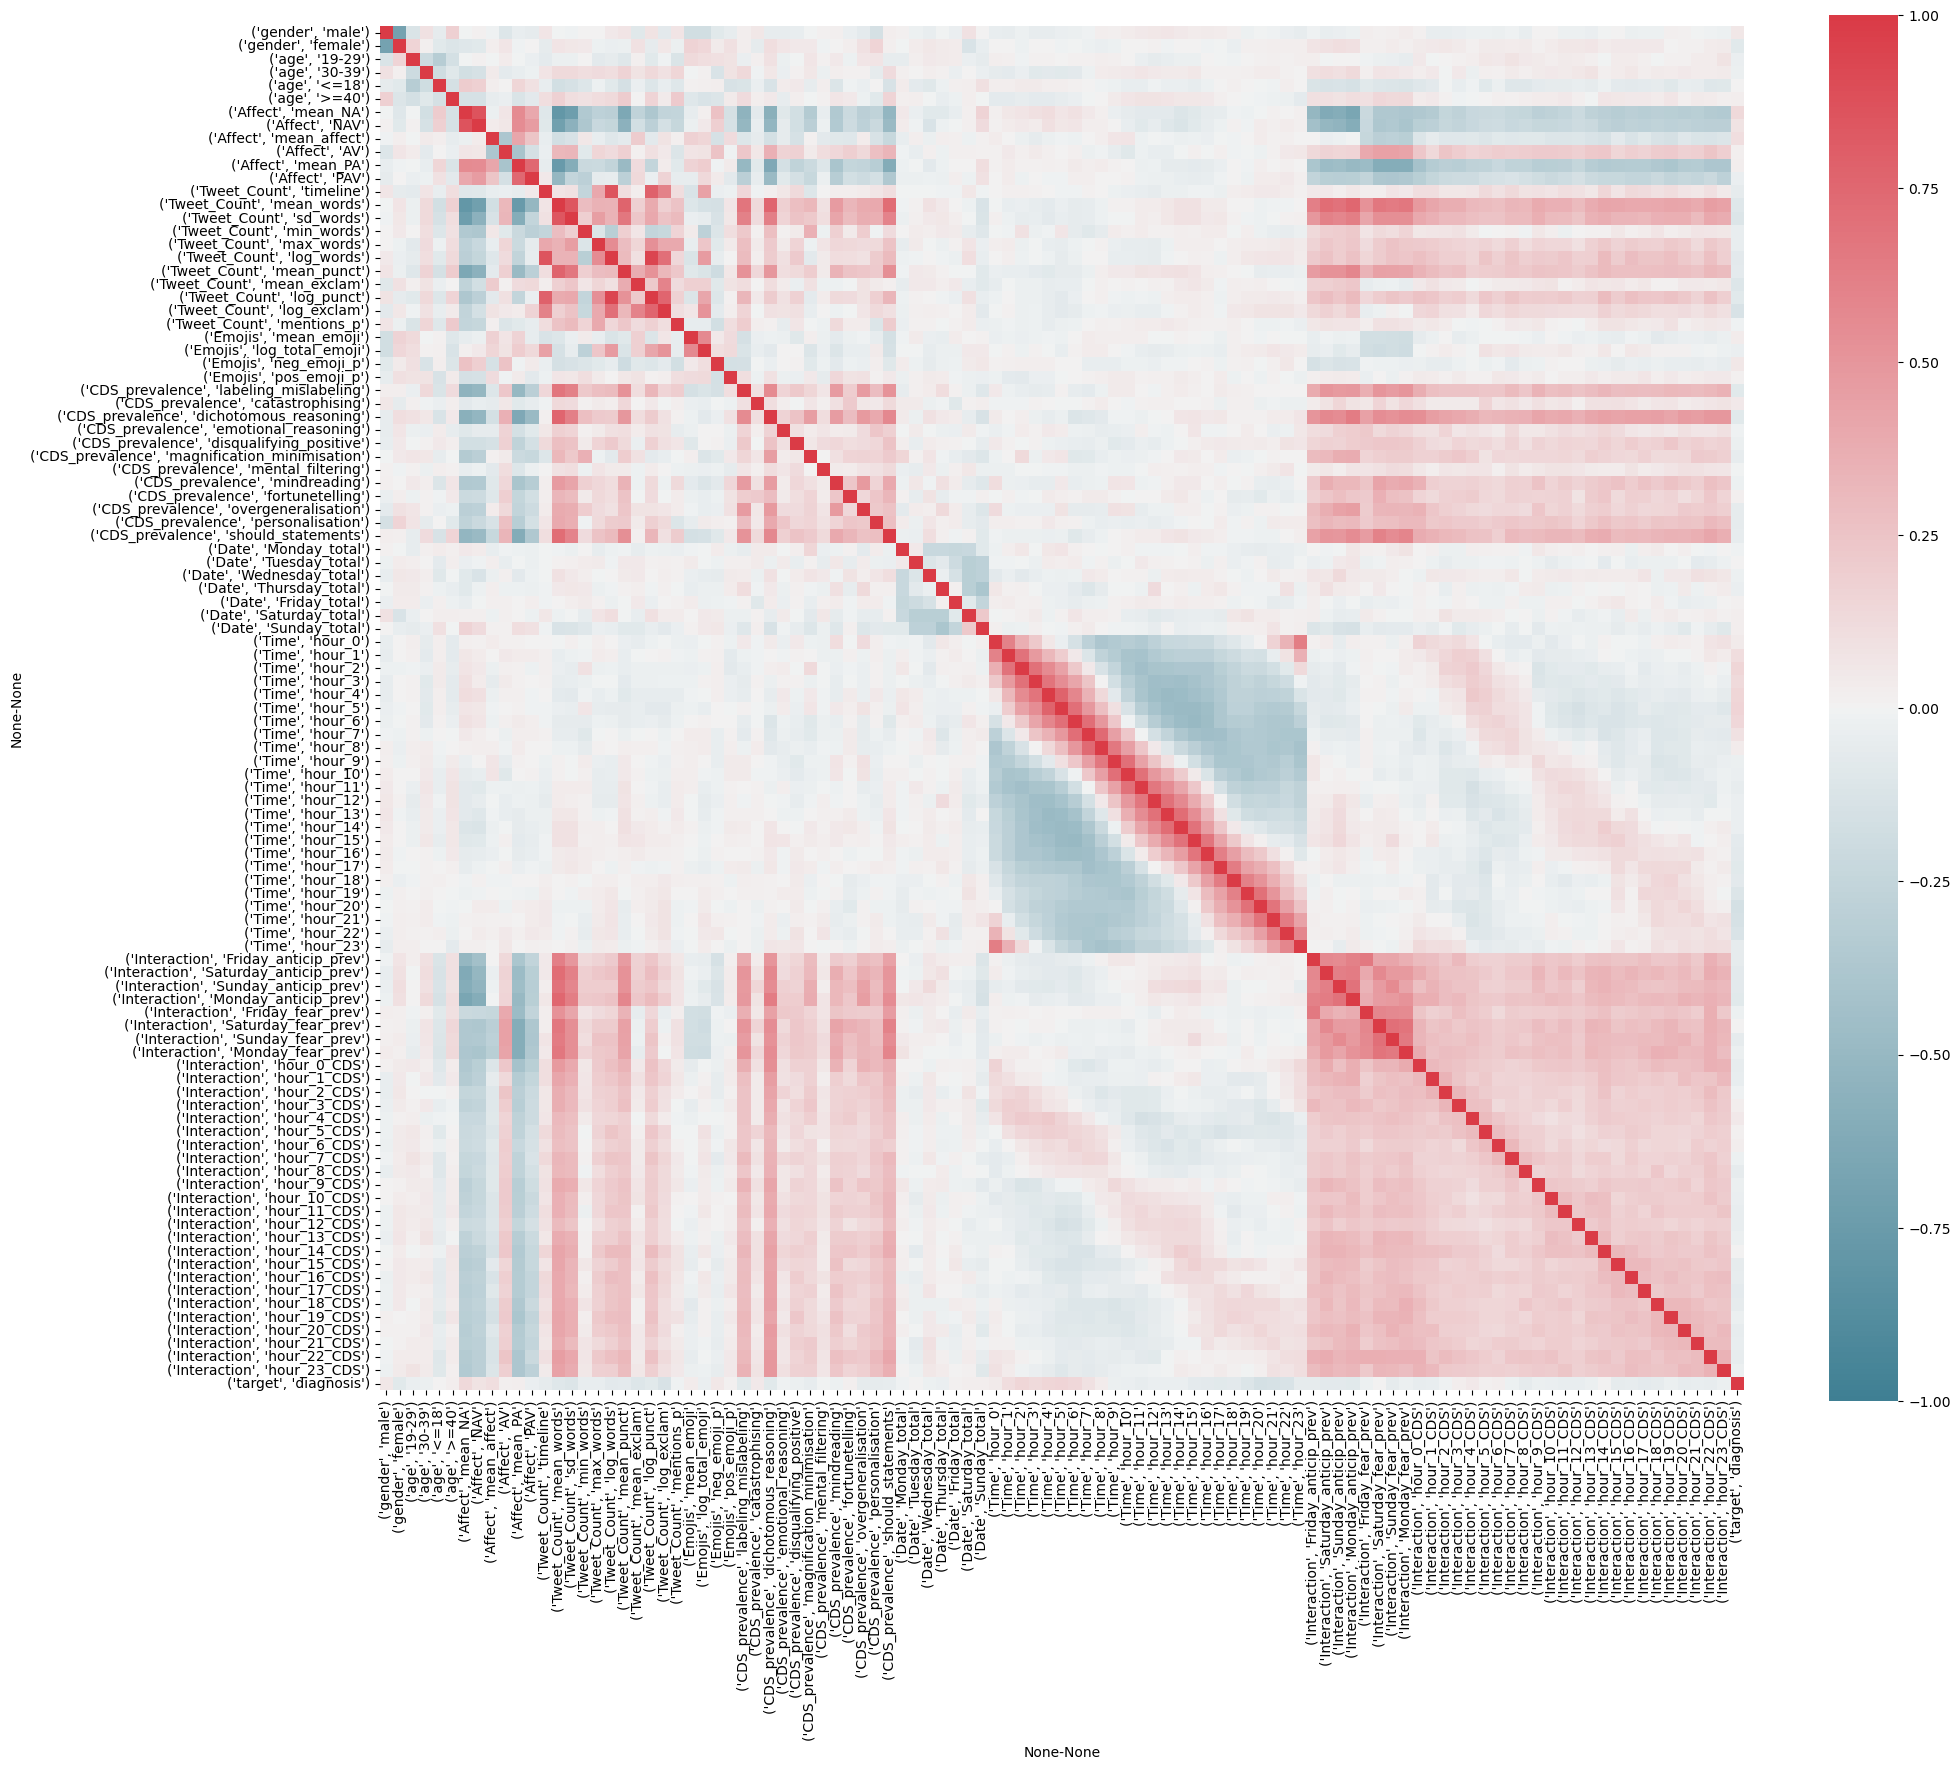

In [43]:
# Convert boolean columns (gender and age) to numeric (int)
df_converted = df.copy()
for col in df_converted.columns:
    if df_converted[col].dtype == bool:
        df_converted[col] = df_converted[col].astype(int)

# Select only numeric columns after conversion
df_numeric = df_converted.select_dtypes(include=np.number)

# run correlation matrix and plot
f, ax = plt.subplots(figsize=(22, 18))
corr = df_numeric.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, xticklabels= corr.columns.values,
            yticklabels= corr.columns.values, vmin=-1.0, vmax=1.0, 
            center=0, cbar=True)

In [44]:
high_corr = corr[(corr > 0.8) & (corr < 1.0)]

In [45]:
high_corr

gender          age                  \
                                            male female 19-29 30-39 <=18 >=40   
gender         male                          NaN    NaN   NaN   NaN  NaN  NaN   
               female                        NaN    NaN   NaN   NaN  NaN  NaN   
age            19-29                         NaN    NaN   NaN   NaN  NaN  NaN   
               30-39                         NaN    NaN   NaN   NaN  NaN  NaN   
               <=18                          NaN    NaN   NaN   NaN  NaN  NaN   
               >=40                          NaN    NaN   NaN   NaN  NaN  NaN   
Affect         mean_NA                       NaN    NaN   NaN   NaN  NaN  NaN   
               NAV                           NaN    NaN   NaN   NaN  NaN  NaN   
               mean_affect                   NaN    NaN   NaN   NaN  NaN  NaN   
               AV                            NaN    NaN   NaN   NaN  NaN  NaN   
               mean_PA                       NaN    NaN   NaN   NaN  NaN  NaN   
               PAV                           NaN    NaN   NaN   NaN  NaN  NaN   
Tweet_Count    timeline                      NaN    NaN   NaN   NaN  NaN  NaN   
               mean_words                    NaN    NaN   NaN   NaN  NaN  NaN   
               sd_words                      NaN    NaN   NaN   NaN  NaN  NaN   
               min_words                     NaN    NaN   NaN   NaN  NaN  NaN   
               max_words                     NaN    NaN   NaN   NaN  NaN  NaN   
               log_words                     NaN    NaN   NaN   NaN  NaN  NaN   
               mean_punct                    NaN    NaN   NaN   NaN  NaN  NaN   
               mean_exclam                   NaN    NaN   NaN   NaN  NaN  NaN   
               log_punct                     NaN    NaN   NaN   NaN  NaN  NaN   
               log_exclam                    NaN    NaN   NaN   NaN  NaN  NaN   
               mentions_p                    NaN    NaN   NaN   NaN  NaN  NaN   
Emojis         mean_emoji                    NaN    NaN   NaN   NaN  NaN  NaN   
               log_total_emoji               NaN    NaN   NaN   NaN  NaN  NaN   
               neg_emoji_p                   NaN    NaN   NaN   NaN  NaN  NaN   
               pos_emoji_p                   NaN    NaN   NaN   NaN  NaN  NaN   
CDS_prevalence labeling_mislabeling          NaN    NaN   NaN   NaN  NaN  NaN   
               catastrophising               NaN    NaN   NaN   NaN  NaN  NaN   
               dichotomous_reasoning         NaN    NaN   NaN   NaN  NaN  NaN   
               emotional_reasoning           NaN    NaN   NaN   NaN  NaN  NaN   
               disqualifying_positive        NaN    NaN   NaN   NaN  NaN  NaN   
               magnification_minimisation    NaN    NaN   NaN   NaN  NaN  NaN   
               mental_filtering              NaN    NaN   NaN   NaN  NaN  NaN   
               mindreading                   NaN    NaN   NaN   NaN  NaN  NaN   
               fortunetelling                NaN    NaN   NaN   NaN  NaN  NaN   
               overgeneralisation            NaN    NaN   NaN   NaN  NaN  NaN   
               personalisation               NaN    NaN   NaN   NaN  NaN  NaN   
               should_statements             NaN    NaN   NaN   NaN  NaN  NaN   
Date           Monday_total                  NaN    NaN   NaN   NaN  NaN  NaN   
               Tuesday_total                 NaN    NaN   NaN   NaN  NaN  NaN   
               Wednesday_total               NaN    NaN   NaN   NaN  NaN  NaN   
               Thursday_total                NaN    NaN   NaN   NaN  NaN  NaN   
               Friday_total                  NaN    NaN   NaN   NaN  NaN  NaN   
               Saturday_total                NaN    NaN   NaN   NaN  NaN  NaN   
               Sunday_total                  NaN    NaN   NaN   NaN  NaN  NaN   
Time           hour_0                        NaN    NaN   NaN   NaN  NaN  NaN   
               hour_1                        NaN    NaN   NaN   NaN  NaN 

From this table, we selected two features to be removed: log_words and mean_words. NA/NAV and PA/PAV also correlate highly, but for theoretical testing, we kept them in.

In [46]:
columns_to_drop = [('Tweet_Count', 'log_words'),
                   ('Tweet_Count', 'mean_words')]

df = df.drop(columns=columns_to_drop)

## Save these datasets to be used for model comparison

In [ ]:
df.to_csv('../Data/combined_sets/data_rq1_final.tsv', sep='\t')